In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Rental_Fully_Prepared_For_LSTM.csv')
df.head()

,Price,Area,Floor,Total_floor,Orientation,Longitude,Latitude,Elevators,Water,Electricity,...,Community name,Lease method,Room,Hall,Toilet,Availability,Showings time,Listing Year,Listing Month,Listing Day
0,6000,0.114894,0.129630,0.113924,0.090009,0.529993,0.274260,1,1,1,...,2485,1,0.250,0.166667,0.125,1,0,1.0,0.363636,0.133333
1,4600,0.087943,0.240741,0.215190,0.000900,0.541752,0.264924,1,1,1,...,638,1,0.125,0.166667,0.125,1,2,1.0,0.272727,0.833333
2,4800,0.097872,0.222222,0.189873,0.090909,0.536866,0.260947,1,1,1,...,2486,1,0.250,0.333333,0.250,1,2,1.0,0.363636,0.366667
3,6800,0.103546,0.277778,0.379747,0.090909,0.475070,0.207763,1,1,1,...,2296,1,0.250,0.333333,0.125,1,2,1.0,0.272727,0.766667
4,6500,0.103546,0.129630,0.379747,0.090009,0.464065,0.193519,1,1,1,...,346,1,0.125,0.166667,0.125,1,2,1.0,0.363636,0.900000


In [3]:
df.info

<bound method DataFrame.info of        Price      Area     Floor  Total_floor  Orientation  Longitude  \
0       6000  0.114894  0.129630     0.113924     0.090009   0.529993   
1       4600  0.087943  0.240741     0.215190     0.000900   0.541752   
2       4800  0.097872  0.222222     0.189873     0.090909   0.536866   
3       6800  0.103546  0.277778     0.379747     0.090909   0.475070   
4       6500  0.103546  0.129630     0.379747     0.090009   0.464065   
...      ...       ...       ...          ...          ...        ...   
18605   1190  0.014184  0.351852     0.341772     0.990099   0.330247   
18606   1690  0.017021  0.148148     0.443038     0.990099   0.319010   
18607   1490  0.024113  0.518519     0.379747     0.990099   0.305509   
18608   1990  0.034043  0.277778     0.341772     0.990099   0.300547   
18609   1790  0.036879  0.185185     0.177215     0.990099   0.311302   

       Latitude  Elevators  Water  Electricity  ...  Community name  \
0      0.274260     

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [5]:
# Split the dataset into training and test sets
X = df.iloc[:, 1:]  # Features
y = df.iloc[:, 0]   # Target variable (house prices)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Create the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
rf_model.fit(X_train, y_train)
y_pred_train = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

In [8]:
def cal_acc(Y_pred,Y_test):
        mse =0
        tolerance = 0.1
        total = len(Y_test)
        accuracy = 0
        for i in range(total):
            diff = abs(Y_pred[i]-Y_test[i])
            mse += diff ** 2
            if diff /Y_test[i] <= tolerance:
               accuracy += 1
        mse /= total
        accuracy /= total
        #print("误差率为",tolerance,"时mse：",mse)
        print("误差率为",tolerance,"时准确率：",accuracy)
        return mse,accuracy
def average_erro(Y_pred,Y_test):
        errors = abs(Y_pred - Y_test)
        error_rate = np.mean(errors/Y_test)
        accuracy=1-error_rate
        print("平均误差率：",error_rate)
        print("平均准确率",accuracy)

In [9]:
print("MSE on Train Set:", train_mse)
print("R-squared on Train Set:", train_r2)
print("MSE on Test Set:", test_mse)
print("R-squared on Test Set:", test_r2)
print('train-------------')
y_train = np.array(y_train)
cal_acc(y_pred_train,y_train)

average_erro(y_pred_train,y_train)
print('test---------------')
y_test = np.array(y_test)
cal_acc(y_pred,y_test)
average_erro(y_pred,y_test)

MSE on Train Set: 2359024.505759122
R-squared on Train Set: 0.9691952579368172
MSE on Test Set: 16530249.574603649
R-squared on Test Set: 0.7678890670622062
train-------------
误差率为 0.1 时准确率： 0.9032010439855684
平均误差率： 0.048840704560483596
平均准确率 0.9511592954395164
test---------------
误差率为 0.1 时准确率： 0.5769299659681175
平均误差率： 0.14245188635837505
平均准确率 0.857548113641625


In [10]:
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
# 输出 RMSLE 值
print("RMSLE:", rmsle)

RMSLE: 0.20573547376207654


In [11]:
params = rf_model.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [12]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
     'max_features': [1, 0.5, 'sqrt', 'log2', None]
}

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
best_params = {}
for param in param_grid:
    print(f"Optimizing parameter: {param}")
    train_r2_scores = []
    test_r2_scores = []
    for val in param_grid[param]:
        grid_search = GridSearchCV(rf_model, {param: [val]}, cv=5, scoring='r2',error_score='raise')
        grid_search.fit(X_train, y_train)
        train_r2_score = grid_search.best_score_
        test_r2_score = grid_search.score(X_test, y_test)
        train_r2_scores.append(train_r2_score)
        test_r2_scores.append(test_r2_score)
        print(f"Value: {val}, Train R-squared: {train_r2_score:.4f}, Test R-squared: {test_r2_score:.4f}")
    best_idx = train_r2_scores.index(max(train_r2_scores))
    best_params[param] = param_grid[param][best_idx]
    print(f"Best value for {param}: {best_params[param]}")

Optimizing parameter: n_estimators
Value: 100, Train R-squared: 0.7534, Test R-squared: 0.7679
Value: 300, Train R-squared: 0.7537, Test R-squared: 0.7713
Value: 500, Train R-squared: 0.7512, Test R-squared: 0.7687
Best value for n_estimators: 300
Optimizing parameter: max_depth
Value: 5, Train R-squared: 0.6818, Test R-squared: 0.7099
Value: 10, Train R-squared: 0.7419, Test R-squared: 0.7574
Value: 15, Train R-squared: 0.7495, Test R-squared: 0.7690
Best value for max_depth: 15
Optimizing parameter: min_samples_split
Value: 2, Train R-squared: 0.7534, Test R-squared: 0.7679
Value: 5, Train R-squared: 0.7415, Test R-squared: 0.7646
Value: 10, Train R-squared: 0.7460, Test R-squared: 0.7559
Best value for min_samples_split: 2
Optimizing parameter: min_samples_leaf
Value: 1, Train R-squared: 0.7534, Test R-squared: 0.7679
Value: 2, Train R-squared: 0.7897, Test R-squared: 0.7721
Value: 4, Train R-squared: 0.7980, Test R-squared: 0.7526
Best value for min_samples_leaf: 4
Optimizing param

In [14]:
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 0.5}


In [15]:
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)



In [16]:
print("MSE on Train Set:", train_mse)
print("R-squared on Train Set:", train_r2)
print("MSE on Test Set:", test_mse)
print("R-squared on Test Set:", test_r2)
print('train-------------')
y_train = np.array(y_train)
cal_acc(y_train_pred,y_train)

average_erro(y_train_pred,y_train)
print('test---------------')
y_test = np.array(y_test)
cal_acc(y_test_pred,y_test)
average_erro(y_test_pred,y_test)


MSE on Train Set: 8636277.085195512
R-squared on Train Set: 0.8872252970046978
MSE on Test Set: 15734406.137282666
R-squared on Test Set: 0.7790639717044685
train-------------
误差率为 0.1 时准确率： 0.6940968757196592
平均误差率： 0.09581196923450212
平均准确率 0.9041880307654979
test---------------
误差率为 0.1 时准确率： 0.5548987999283539
平均误差率： 0.14469805041002978
平均准确率 0.8553019495899702


In [17]:
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, y_test_pred))
# 输出 RMSLE 值
print("RMSLE:", rmsle)

RMSLE: 0.2047634706440649


In [18]:
print(y_test_pred)

[ 7614.73214234 19957.61658888  4796.77565061 ...  4285.13047362
  2683.16241522 24126.67895822]


In [19]:
print(y_test)

[ 5000 18000  4500 ...  5000  2100 10600]


In [20]:
import matplotlib.pyplot as plt

In [21]:
# View feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()[::-1]

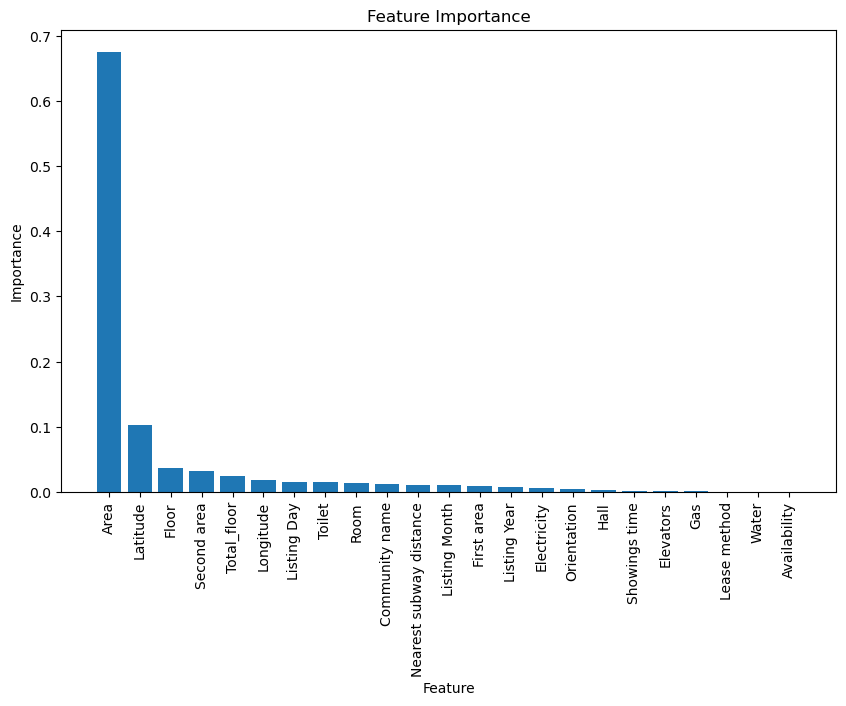

In [22]:
# Plot the feature importance chart
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()